In [ ]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(13) # Better use a prime number for random seed

In [ ]:
def oracle(x):
  # Define an oracle that generates a function that we want to learn
  return np.abs(np.abs(x-.4)-.2) + x/2 -.1

In [ ]:
n = 4 # Number of samples
npl = 1000 # Number of samples for plotting

In [ ]:
x = np.random.rand(n) # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
y = oracle(x)

In [ ]:
xpl = np.linspace(0,1,npl)
ypl = oracle(xpl)

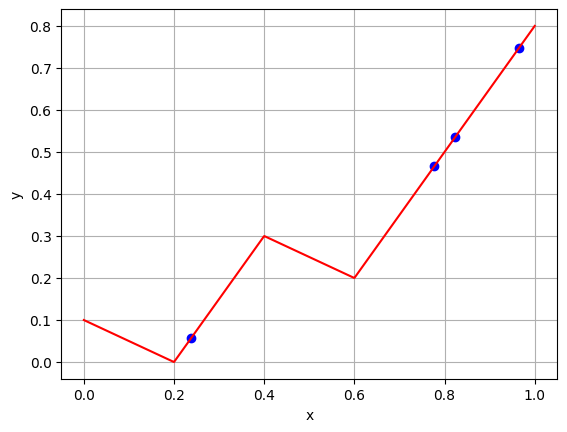

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xpl, ypl, 'r')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

In [ ]:
# Convert x and y into matrices
x = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()
xpl = np.asmatrix(xpl).transpose()
ypl = np.asmatrix(ypl).transpose()

In [ ]:
# (X'*X) * c = X' * y
for p in range(0,4): # Try different values of the polynomial degree
  X = nml.ones((n,1)) # Create a matrix of ones
  Xt = nml.ones((nt,1))
  for i in range(1,p+1):
    X = np.concatenate((X,np.power(x,i)), axis = 1) # Create a matrix of powers of x
    Xt = np.concatenate((Xt,np.power(xpl,i)), axis = 1)

  c = np.linalg.solve(np.matmul(np.transpose(X), X), np.matmul(np.transpose(X), y)) # Solve the linear system
  yp = np.matmul(Xt, c) # Find values of predicted y
  err = np.mean(np.abs(yp-ypl)) # Compute error
  print(p, err)

0 0.24283091499530463
1 0.07975328753320991
2 0.043207555036111726
3 0.07933014355824781


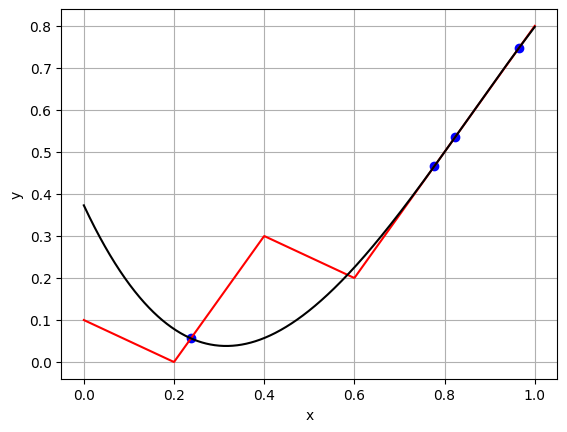

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xpl, ypl, 'r')
ax.plot(xpl, yp, 'k')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

0 0.24283091499530463
1 0.07975328753320991
2 0.04321381251623783
3 0.0620450643426746
4 0.04640822530480695
5 0.04591704897289572
6 0.047869440994688504
7 0.046217008968952845
8 0.045521388951976924
9 0.045625754029147945
10 0.04554278038149466
11 0.04600415166101262
12 0.04598873228472605
13 0.045982917053704345
14 0.04599924654454797


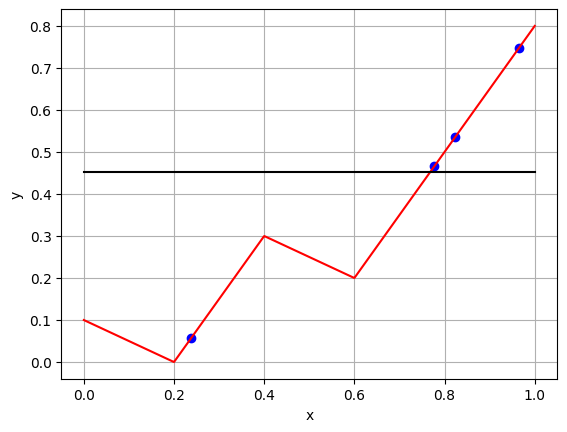

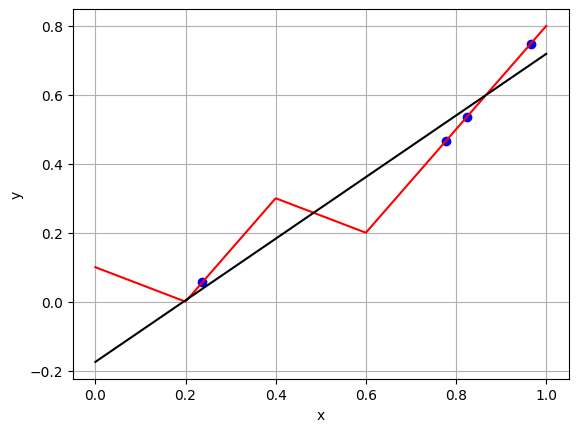

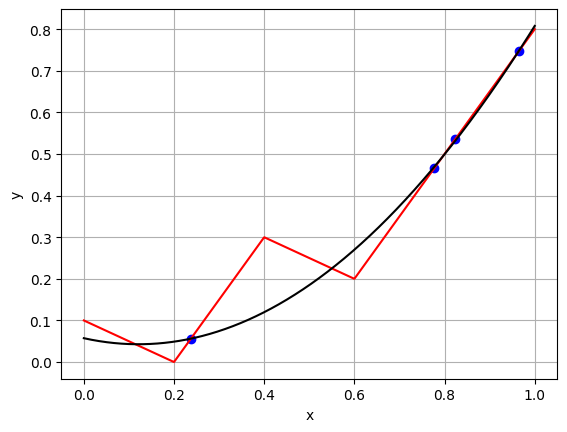

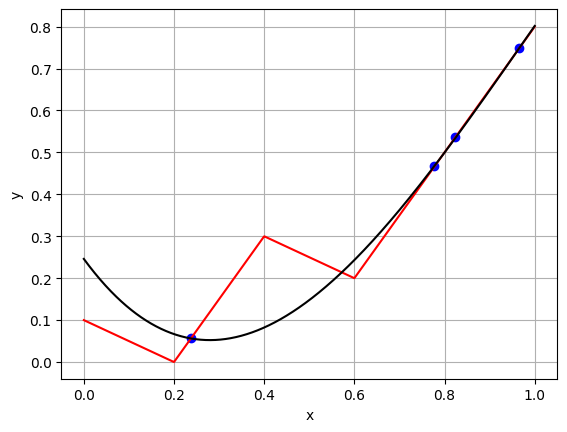

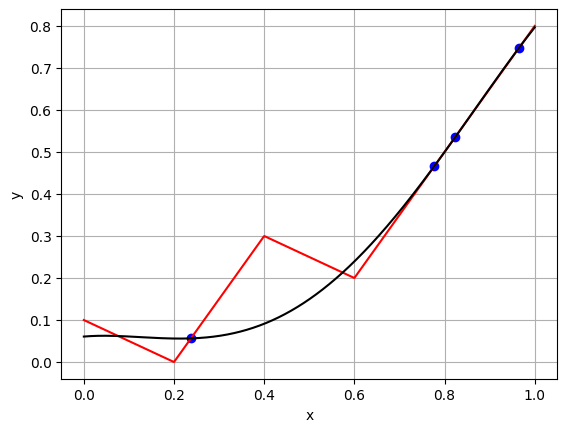

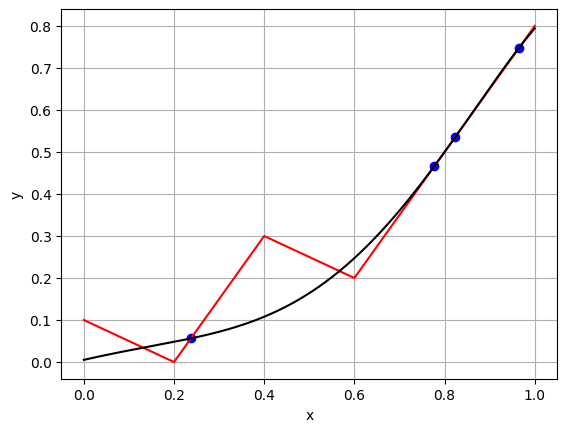

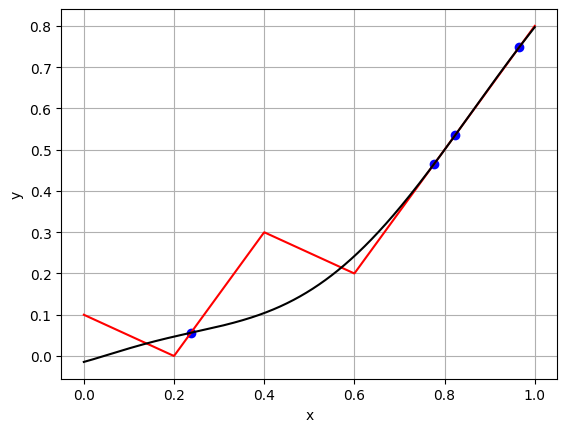

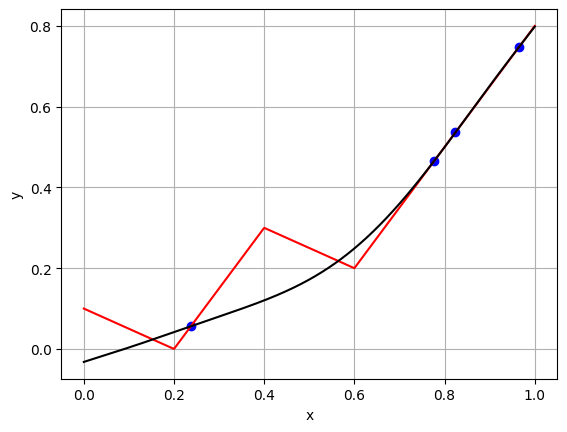

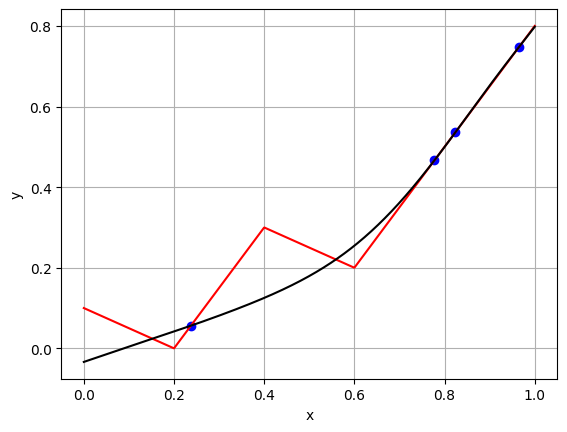

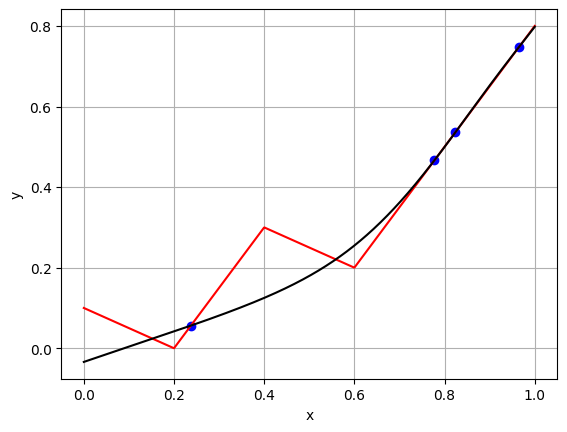

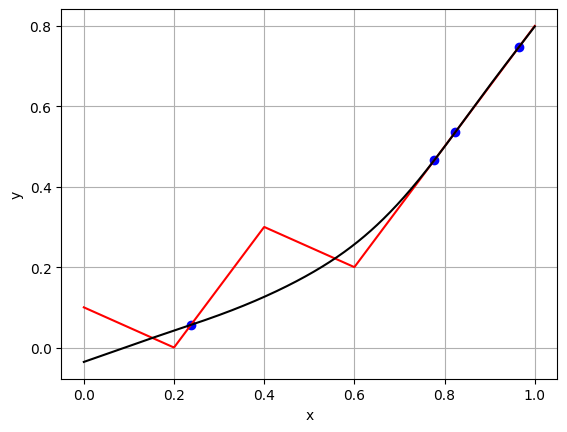

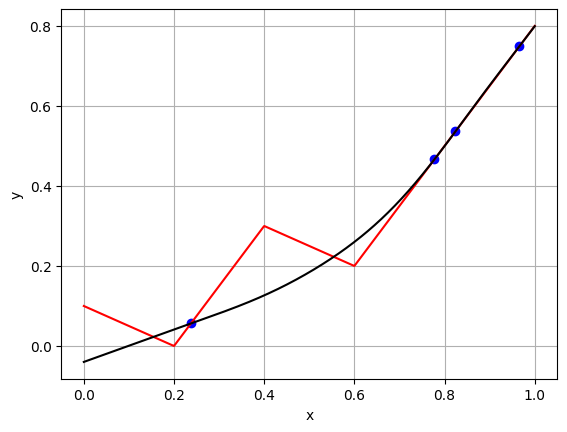

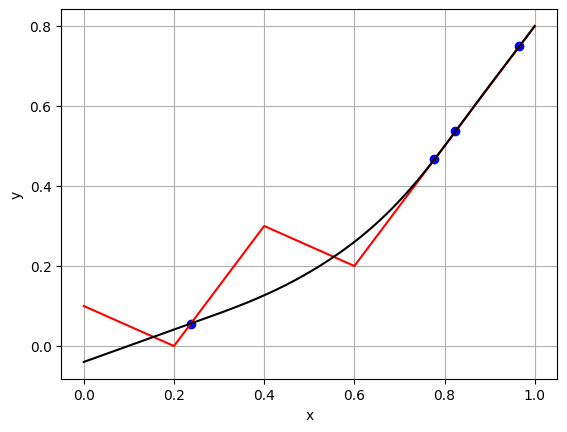

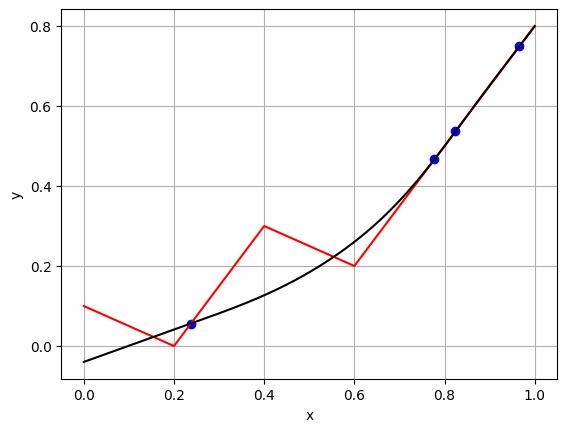

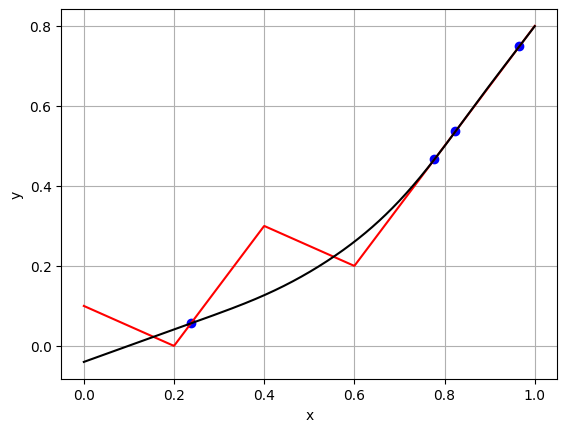

In [ ]:
# USE RIDGE REGRESSION
# ((X'*X) + (lambda * M)) * c = X' * y

lam = .000001 # Choose a small lambda

for p in range(0,15): # Try different values of p
  X = nml.ones((n,1))
  Xt = nml.ones((nt,1))
  for i in range(1,p+1):
    X = np.concatenate((X,np.power(x,i)),axis=1)
    Xt = np.concatenate((Xt,np.power(xpl,i)),axis=1)

  M = nml.zeros((p+1,p+1))
  for i in range(2,p+1):
    for j in range(2,p+1):
      M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)

  c = np.linalg.solve(np.matmul(np.transpose(X),X)+lam*M,np.matmul(np.transpose(X),y))
  yp = np.matmul(Xt,c)
  err = np.mean(np.abs(yp-ypl))
  print(str(p) + " " + str(err))

  fig, ax = plt.subplots()
  ax.plot(x,y,'bo')
  ax.plot(xpl,ypl,'r')
  ax.plot(xpl,yp,'k')
  ax.set(xlabel='x',ylabel='y')
  ax.grid()